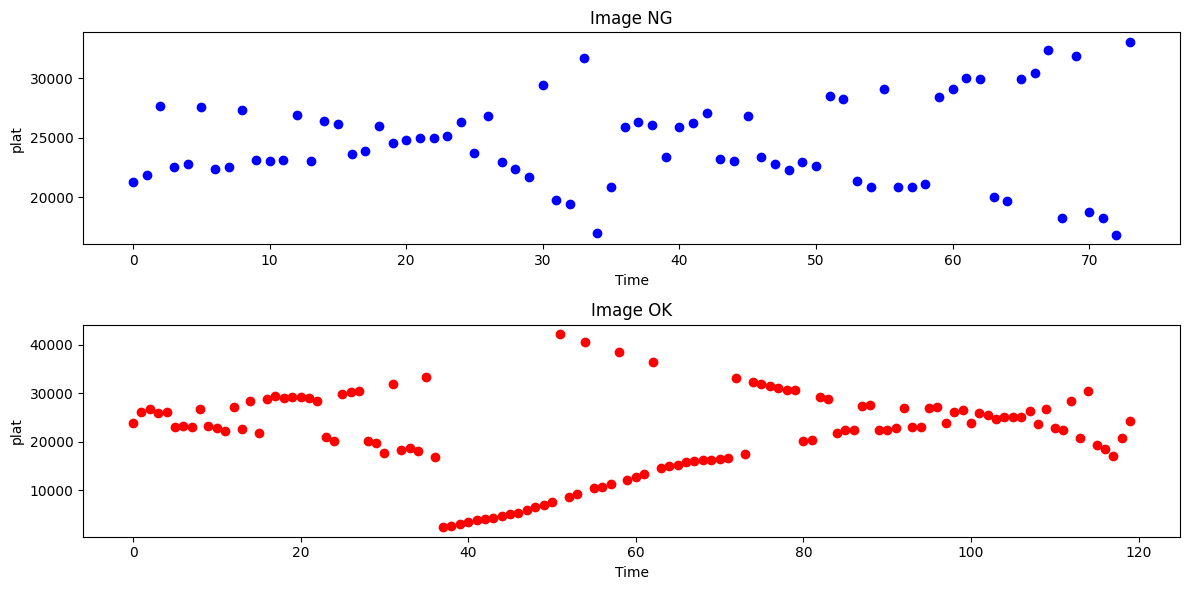

In [3]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu
import glob
from scipy.stats import linregress
from sklearn.mixture import GaussianMixture as GMM


def process_images(path):
    time = 0
    time_list = []
    area_list = []
    
    for file in glob.glob(path):
        img = io.imread(file)
        if img.ndim == 3:
            img = img[:, :, 0]
        entropy_img = entropy(img, disk(22))
        img2 = entropy_img.reshape((-1,1))
        gmm = GMM(n_components = 2,covariance_type='tied').fit(img2)
        gmm_label = gmm.predict(img2)
        segmented = gmm_label.reshape(entropy_img.shape)
        binary_image = np.sum(segmented == True)
        time_list.append(time)
        area_list.append(binary_image)
        time += 1
    
    return time_list, area_list


path_a = "aa/*.*"
path_b = "bb/*.*"

time_list_a, area_list_a = process_images(path_a)
time_list_b, area_list_b = process_images(path_b)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_list_a, area_list_a, 'bo')
plt.title("Image NG")
plt.xlabel("Time")
plt.ylabel("plat")

plt.subplot(2, 1, 2)
plt.plot(time_list_b, area_list_b, 'ro')
plt.title("Image OK")
plt.xlabel("Time")
plt.ylabel("plat")

plt.tight_layout()
plt.show()